<a href="https://colab.research.google.com/github/tsarangler/ECON3916-Statistical-Machine-Learning/blob/main/Lab%203/%20Lab3_Benchmarking_Development_with_WBGAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install wbgapi
import wbgapi as wb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define Economies: GTM (Guatemala), UMC (Upper Middle Income), WLD (World)
country_codes = ['ARE', 'UMC', 'WLD']

indicators = {
    'NY.GDP.PCAP.KD': 'GDP_Per_Capita_Const',     # Standard of Living
    'SL.TLF.CACT.ZS': 'Labor_Part_Rate',          # Labor Supply
    'SL.UEM.TOTL.ZS': 'Unemployment_Rate',        # Labor Friction
    'SL.TLF.TOTL.IN': 'Labor_Force_Total',        # Total Workers
    'NY.GDP.MKTP.KD': 'GDP_Const',                # Economic Size
    'FP.CPI.TOTL.ZG': 'Inflation_CPI',            # Stability
    'NY.GDS.TOTL.ZS': 'Gross_Dom_Savings',        # Savings
    'NE.GDI.TOTL.ZS': 'Gross_Cap_Formation',      # Investment
    'NE.EXP.GNFS.ZS': 'Exports_GDP',              # Exports
    'NE.IMP.GNFS.ZS': 'Imports_GDP',              # Imports
    'GC.TAX.TOTL.GD.ZS': 'Tax_Rev_GDP',           # Gov Revenue
    'NE.CON.GOVT.ZS': 'Gov_Exp_GDP'               # Gov Spending
}

In [13]:
# 1. Fetch Data
print("Fetching data...")
df_raw = wb.data.DataFrame(indicators, economy=country_codes, time=range(2000, 2025))

# 2. Transpose (Flip Rows/Cols)
df = df_raw.T

# 3. Clean Index
df.index = df.index.str.replace('YR', '').astype(int)
df.index.name = 'Year'
df = df.sort_index()

# 4. Rename Columns
df.rename(columns=indicators, level=1, inplace=True)

# 5. Extract Guatemala for specific calculations
df_gtm = df.xs('ARE', axis=1, level=0).copy()

Fetching data...


In [6]:
# 1. Natural Rate of Unemployment (5-Year MA)
df_gtm['Natural_Rate_Unemp'] = df_gtm['Unemployment_Rate'].rolling(window=5).mean()

# 2. Productivity (Output per Worker)
df_gtm['Productivity'] = df_gtm['GDP_Const'] / df_gtm['Labor_Force_Total']

# 3. Net Capital Outflow (Exports - Imports)
df_gtm['NCO'] = df_gtm['Exports_GDP'] - df_gtm['Imports_GDP']

# 4. Budget Balance (Tax - Spending)
df_gtm['Budget_Balance'] = df_gtm['Tax_Rev_GDP'] - df_gtm['Gov_Exp_GDP']

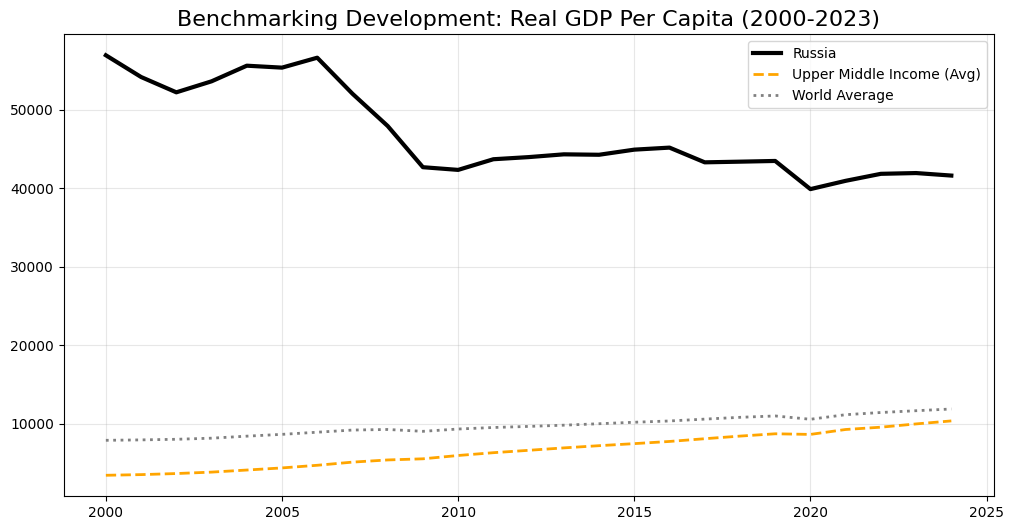

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[('ARE', 'GDP_Per_Capita_Const')], label='Russia', color='k', linewidth=3)

plt.plot(df.index, df[('UMC', 'GDP_Per_Capita_Const')], label='Upper Middle Income (Avg)', color='orange', linestyle='--', linewidth=2)
plt.plot(df.index, df[('WLD', 'GDP_Per_Capita_Const')], label='World Average', color='grey', linestyle=':', linewidth=2)

plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

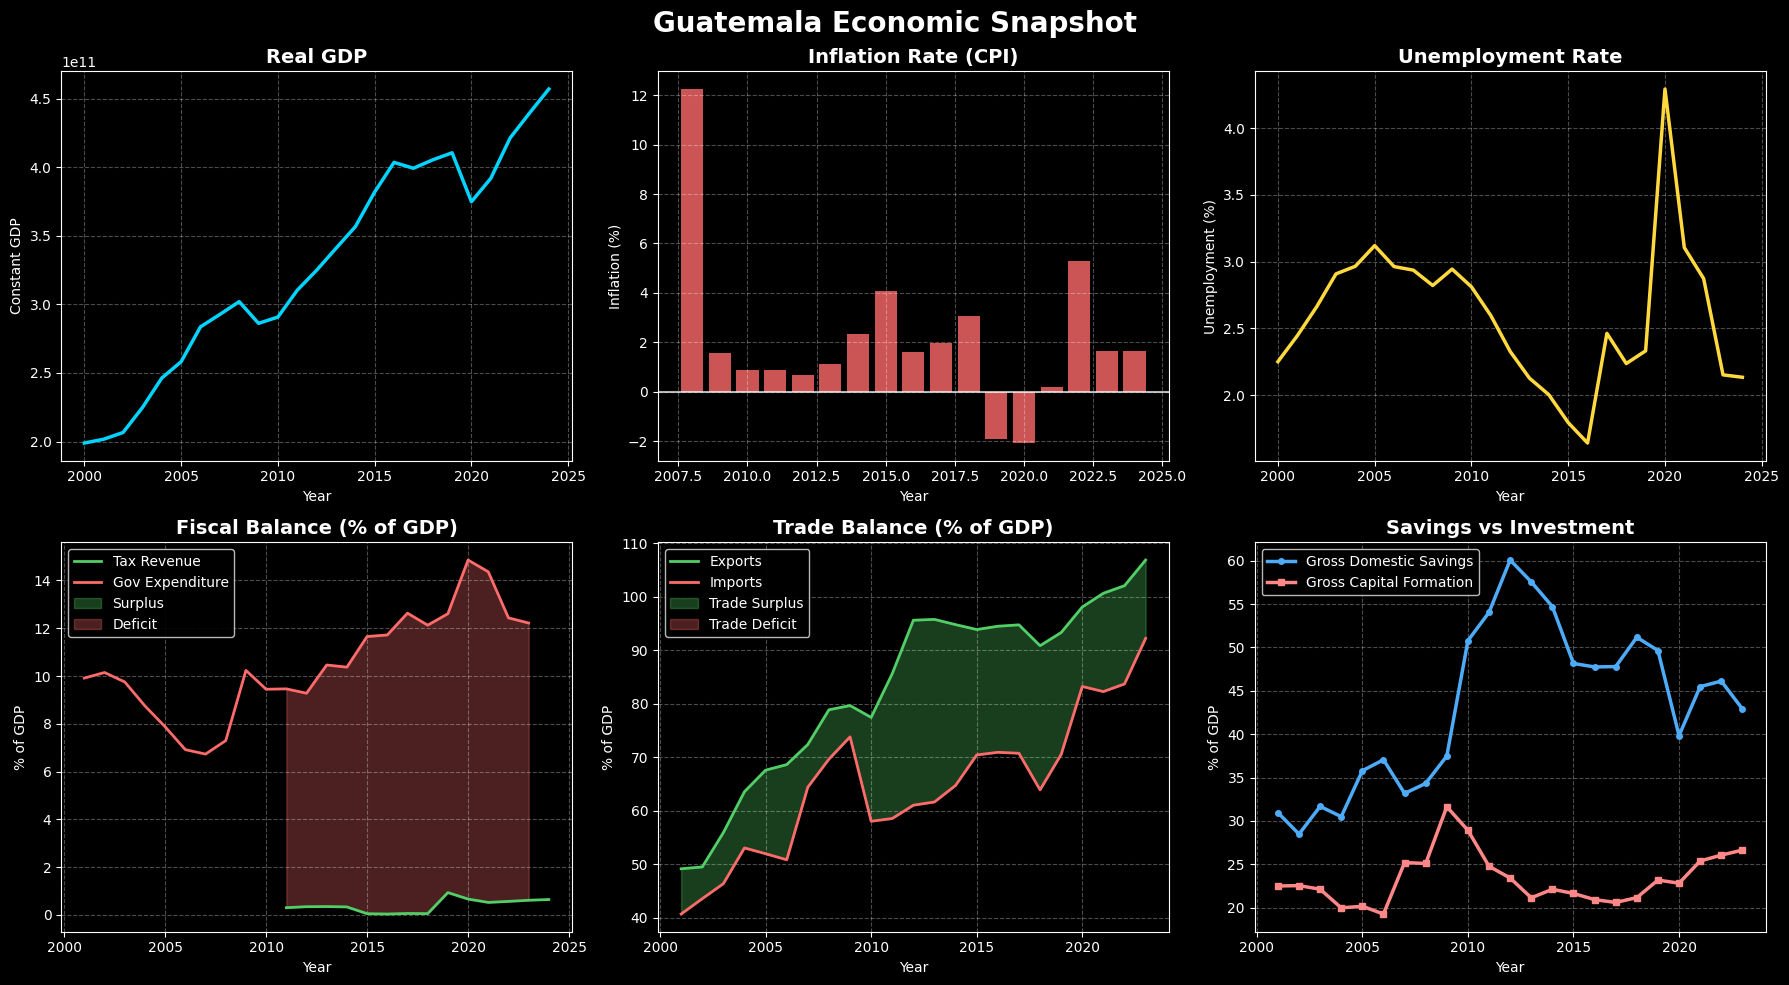

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set dark background style
plt.style.use('dark_background')
sns.set_palette("husl")

# Create 2x3 subplot layout
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Guatemala Economic Snapshot', fontsize=20, fontweight='bold', y=0.98)

# 1. Top Left: Real GDP (Line chart)
axes[0, 0].plot(df_gtm.index, df_gtm['GDP_Const'], linewidth=2.5, color='#00d4ff')
axes[0, 0].set_title('Real GDP', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Constant GDP')
axes[0, 0].grid(alpha=0.3, linestyle='--')

# 2. Top Middle: Inflation Rate (Bar chart with horizontal line at 0)
axes[0, 1].bar(df_gtm.index, df_gtm['Inflation_CPI'], color='#ff6b6b', alpha=0.8)
axes[0, 1].axhline(y=0, color='white', linestyle='-', linewidth=1.5, alpha=0.7)
axes[0, 1].set_title('Inflation Rate (CPI)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Inflation (%)')
axes[0, 1].grid(alpha=0.3, linestyle='--')

# 3. Top Right: Unemployment Rate (Line chart)
axes[0, 2].plot(df_gtm.index, df_gtm['Unemployment_Rate'], linewidth=2.5, color='#ffd93d')
axes[0, 2].set_title('Unemployment Rate', fontsize=14, fontweight='bold')
axes[0, 2].set_xlabel('Year')
axes[0, 2].set_ylabel('Unemployment (%)')
axes[0, 2].grid(alpha=0.3, linestyle='--')

# 4. Bottom Left: Fiscal Balance (Fill area between Tax Revenue and Gov Expenditure)
axes[1, 0].plot(df_gtm.index, df_gtm['Tax_Rev_GDP'], linewidth=2, label='Tax Revenue', color='#51cf66')
axes[1, 0].plot(df_gtm.index, df_gtm['Gov_Exp_GDP'], linewidth=2, label='Gov Expenditure', color='#ff6b6b')
axes[1, 0].fill_between(df_gtm.index, df_gtm['Tax_Rev_GDP'], df_gtm['Gov_Exp_GDP'],
                         where=(df_gtm['Tax_Rev_GDP'] >= df_gtm['Gov_Exp_GDP']),
                         color='#51cf66', alpha=0.3, interpolate=True, label='Surplus')
axes[1, 0].fill_between(df_gtm.index, df_gtm['Tax_Rev_GDP'], df_gtm['Gov_Exp_GDP'],
                         where=(df_gtm['Tax_Rev_GDP'] < df_gtm['Gov_Exp_GDP']),
                         color='#ff6b6b', alpha=0.3, interpolate=True, label='Deficit')
axes[1, 0].set_title('Fiscal Balance (% of GDP)', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('% of GDP')
axes[1, 0].legend(loc='best', framealpha=0.9)
axes[1, 0].grid(alpha=0.3, linestyle='--')

# 5. Bottom Middle: Trade Balance (Fill area between Exports and Imports)
axes[1, 1].plot(df_gtm.index, df_gtm['Exports_GDP'], linewidth=2, label='Exports', color='#51cf66')
axes[1, 1].plot(df_gtm.index, df_gtm['Imports_GDP'], linewidth=2, label='Imports', color='#ff6b6b')
axes[1, 1].fill_between(df_gtm.index, df_gtm['Exports_GDP'], df_gtm['Imports_GDP'],
                         where=(df_gtm['Exports_GDP'] >= df_gtm['Imports_GDP']),
                         color='#51cf66', alpha=0.3, interpolate=True, label='Trade Surplus')
axes[1, 1].fill_between(df_gtm.index, df_gtm['Exports_GDP'], df_gtm['Imports_GDP'],
                         where=(df_gtm['Exports_GDP'] < df_gtm['Imports_GDP']),
                         color='#ff6b6b', alpha=0.3, interpolate=True, label='Trade Deficit')
axes[1, 1].set_title('Trade Balance (% of GDP)', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('% of GDP')
axes[1, 1].legend(loc='best', framealpha=0.9)
axes[1, 1].grid(alpha=0.3, linestyle='--')

# 6. Bottom Right: Savings vs Investment (Dual lines)
axes[1, 2].plot(df_gtm.index, df_gtm['Gross_Dom_Savings'], linewidth=2.5,
                label='Gross Domestic Savings', color='#4dabf7', marker='o', markersize=4)
axes[1, 2].plot(df_gtm.index, df_gtm['Gross_Cap_Formation'], linewidth=2.5,
                label='Gross Capital Formation', color='#ff8787', marker='s', markersize=4)
axes[1, 2].set_title('Savings vs Investment', fontsize=14, fontweight='bold')
axes[1, 2].set_xlabel('Year')
axes[1, 2].set_ylabel('% of GDP')
axes[1, 2].legend(loc='best', framealpha=0.9)
axes[1, 2].grid(alpha=0.3, linestyle='--')

# Apply tight layout
plt.tight_layout()
plt.show()